## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
heart = pd.read_csv("/content/ha_1.csv")

heart.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Prepare the data
le = LabelEncoder()
heart['diagnosis'] = le.fit_transform(heart['diagnosis'])  # Encode target variable

# Select predictors and target
X = heart[['age', 'chol']]
y = heart['diagnosis']

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Extract model parameters
intercept = log_reg.intercept_[0]
coefficients = dict(zip(X.columns, log_reg.coef_[0]))

# Cholesterol for 90% probability
prob_90 = np.log(0.9 / (1 - 0.9))
chol_90_prob = (prob_90 - intercept - coefficients['age'] * 55) / coefficients['chol']

# Output the results
print(f"Cholesterol level for 90% probability of heart disease: {chol_90_prob:.2f} mg/dL")

Cholesterol level for 90% probability of heart disease: 1587.72 mg/dL


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Extract coefficients and intercept
lda_intercept = lda.intercept_[0]
lda_coefficients = dict(zip(X.columns, lda.coef_[0]))

# Calculate the cholesterol level for prediction boundary
chol_threshold = (-lda_intercept - lda_coefficients['age'] * 55) / lda_coefficients['chol']

# Output the result
print(f"Cholesterol level for predicting heart disease using LDA: {chol_threshold:.2f} mg/dL")

Cholesterol level for predicting heart disease using LDA: 368.24 mg/dL


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define parameter grid
param_grid = {'svc__C': [0.1, 1, 10]}

# Create pipeline with standard scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', probability=True))
])

# Use GridSearchCV with reduced parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3)
grid_search.fit(X, y)

# Best model from grid search
best_svc = grid_search.best_estimator_

# Extract coefficients and intercept
svc_intercept = best_svc.named_steps['svc'].intercept_[0]
svc_coefficients = dict(zip(X.columns, best_svc.named_steps['svc'].coef_[0]))

# Calculate cholesterol level for prediction boundary
chol_threshold_svc = (-svc_intercept - svc_coefficients['age'] * 55) / svc_coefficients['chol']

# Output the result
print(f"Best regularization parameter (C): {grid_search.best_params_['svc__C']}")
print(f"Cholesterol level for predicting heart disease using SVC: {chol_threshold_svc:.2f} mg/dL")

Best regularization parameter (C): 1
Cholesterol level for predicting heart disease using SVC: -168.60 mg/dL


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

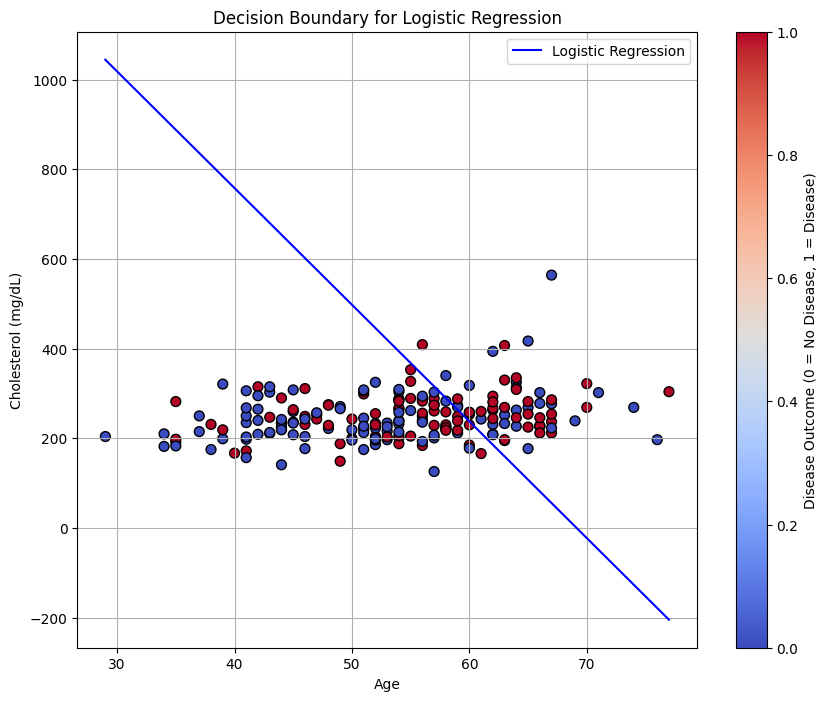

In [ ]:
import matplotlib.pyplot as plt

# Logistic Regression
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    heart['age'], heart['chol'], c=heart['diagnosis'], cmap='coolwarm', edgecolor='k', s=50
)
plt.colorbar(scatter, label="Disease Outcome (0 = No Disease, 1 = Disease)")

# Age range for plotting decision boundary
age_range = np.linspace(heart['age'].min(), heart['age'].max(), 100)

# Decision boundary for Logistic Regression
chol_lr = (-intercept - coefficients['age'] * age_range) / coefficients['chol']
plt.plot(age_range, chol_lr, label="Logistic Regression", color='blue')

# Formatting
plt.title("Decision Boundary for Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dL)")
plt.legend()
plt.grid(True)
plt.show()

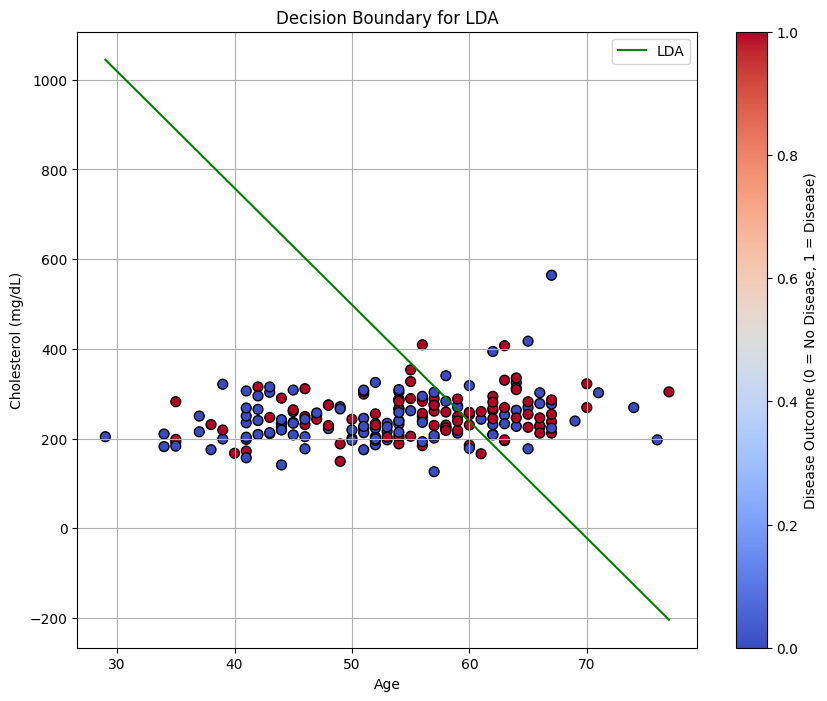

In [ ]:
# Linear Discriminant Analysis
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    heart['age'], heart['chol'], c=heart['diagnosis'], cmap='coolwarm', edgecolor='k', s=50
)
plt.colorbar(scatter, label="Disease Outcome (0 = No Disease, 1 = Disease)")

# Decision boundary for LDA
chol_lda = (-lda_intercept - lda_coefficients['age'] * age_range) / lda_coefficients['chol']
plt.plot(age_range, chol_lda, label="LDA", color='green')

# Formatting
plt.title("Decision Boundary for LDA")
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dL)")
plt.legend()
plt.grid(True)
plt.show()

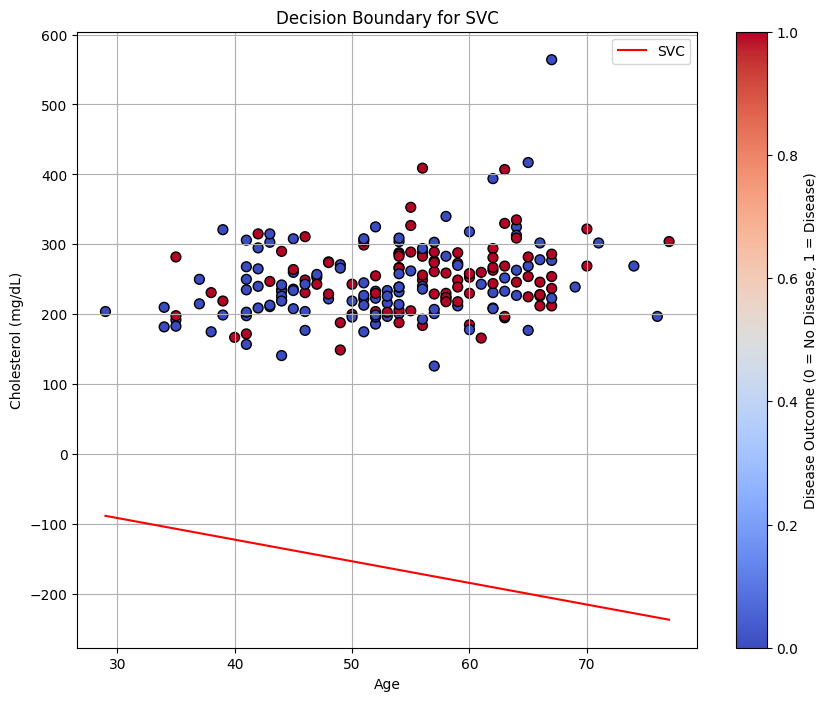

In [ ]:
# Support Vector Classifier
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    heart['age'], heart['chol'], c=heart['diagnosis'], cmap='coolwarm', edgecolor='k', s=50
)
plt.colorbar(scatter, label="Disease Outcome (0 = No Disease, 1 = Disease)")

# Decision boundary for SVC
chol_svc = (-svc_intercept - svc_coefficients['age'] * age_range) / svc_coefficients['chol']
plt.plot(age_range, chol_svc, label="SVC", color='red')

# Formatting
plt.title("Decision Boundary for SVC")
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dL)")
plt.legend()
plt.grid(True)
plt.show()